In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# import and read all csv files
matches=pd.read_csv('WorldCupMatches.csv')
players=pd.read_csv('WorldCupPlayers.csv')
cups=pd.read_csv('WorldCups.csv')

In [3]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [5]:
matches['Datetime']=pd.to_datetime(matches['Datetime'])

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  852 non-null    float64       
 1   Datetime              852 non-null    datetime64[ns]
 2   Stage                 852 non-null    object        
 3   Stadium               852 non-null    object        
 4   City                  852 non-null    object        
 5   Home Team Name        852 non-null    object        
 6   Home Team Goals       852 non-null    float64       
 7   Away Team Goals       852 non-null    float64       
 8   Away Team Name        852 non-null    object        
 9   Win conditions        852 non-null    object        
 10  Attendance            850 non-null    float64       
 11  Half-time Home Goals  852 non-null    float64       
 12  Half-time Away Goals  852 non-null    float64       
 13  Referee           

In [7]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [8]:
mask=matches.isna()
mask=mask.any(axis=1)
matches_na=matches[mask]
matches_na.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,2014-06-30 17:00:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,2014-06-30 17:00:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
852,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
matches_na

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,2014-06-30 17:00:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,2014-06-30 17:00:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
852,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
matches.dropna(inplace=True)


In [11]:
matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [12]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  850 non-null    float64       
 1   Datetime              850 non-null    datetime64[ns]
 2   Stage                 850 non-null    object        
 3   Stadium               850 non-null    object        
 4   City                  850 non-null    object        
 5   Home Team Name        850 non-null    object        
 6   Home Team Goals       850 non-null    float64       
 7   Away Team Goals       850 non-null    float64       
 8   Away Team Name        850 non-null    object        
 9   Win conditions        850 non-null    object        
 10  Attendance            850 non-null    float64       
 11  Half-time Home Goals  850 non-null    float64       
 12  Half-time Away Goals  850 non-null    float64       
 13  Referee             

In [13]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [14]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [15]:
players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [16]:
players=players.drop(['Position','Event'],axis=1)

In [17]:
players.isnull().sum()

RoundID          0
MatchID          0
Team Initials    0
Coach Name       0
Line-up          0
Shirt Number     0
Player Name      0
dtype: int64

In [18]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [19]:
cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [20]:
merged_df=pd.merge(matches,players,on=['RoundID','MatchID'],how ='outer')

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39164 entries, 0 to 39163
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  39072 non-null  float64       
 1   Datetime              39072 non-null  datetime64[ns]
 2   Stage                 39072 non-null  object        
 3   Stadium               39072 non-null  object        
 4   City                  39072 non-null  object        
 5   Home Team Name        39072 non-null  object        
 6   Home Team Goals       39072 non-null  float64       
 7   Away Team Goals       39072 non-null  float64       
 8   Away Team Name        39072 non-null  object        
 9   Win conditions        39072 non-null  object        
 10  Attendance            39072 non-null  float64       
 11  Half-time Home Goals  39072 non-null  float64       
 12  Half-time Away Goals  39072 non-null  float64       
 13  Referee         

In [22]:
merged_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT
1,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO
2,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER
3,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO
4,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI


In [23]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [27]:
grouped=matches[['Year','MatchID']].groupby('Year')['MatchID'].count().reset_index()

In [28]:
grouped

,Year,MatchID
0,1930.0,18
1,1934.0,17
2,1938.0,18
3,1950.0,22
4,1954.0,26
5,1958.0,35
6,1962.0,32
7,1966.0,32
8,1970.0,32
9,1974.0,38


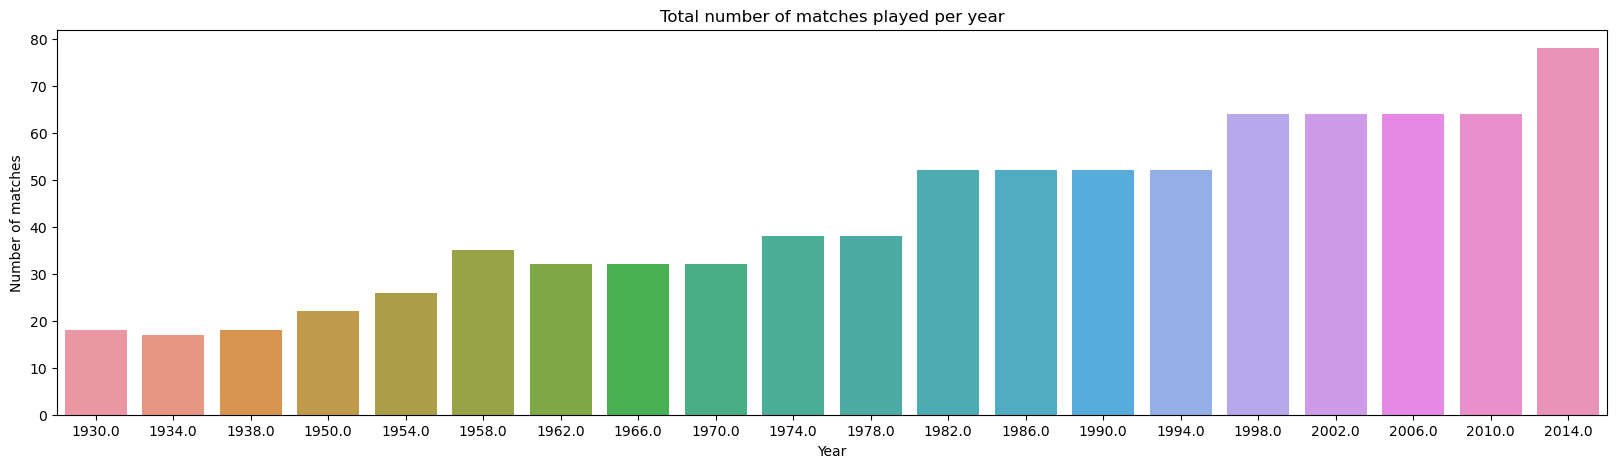

In [30]:
plt.figure(figsize=(20,5))
sns.barplot(x=grouped['Year'],y=grouped['MatchID'])
plt.xlabel('Year')
plt.ylabel('Number of matches')
plt.title('Total number of matches played per year')
plt.show()

In [32]:
grouped=matches[['Year','Attendance']].groupby('Year')['Attendance'].sum().reset_index()

In [33]:
grouped

,Year,Attendance
0,1930.0,590549.0
1,1934.0,363000.0
2,1938.0,375700.0
3,1950.0,1045246.0
4,1954.0,768607.0
5,1958.0,819810.0
6,1962.0,893172.0
7,1966.0,1563135.0
8,1970.0,1603975.0
9,1974.0,1865753.0


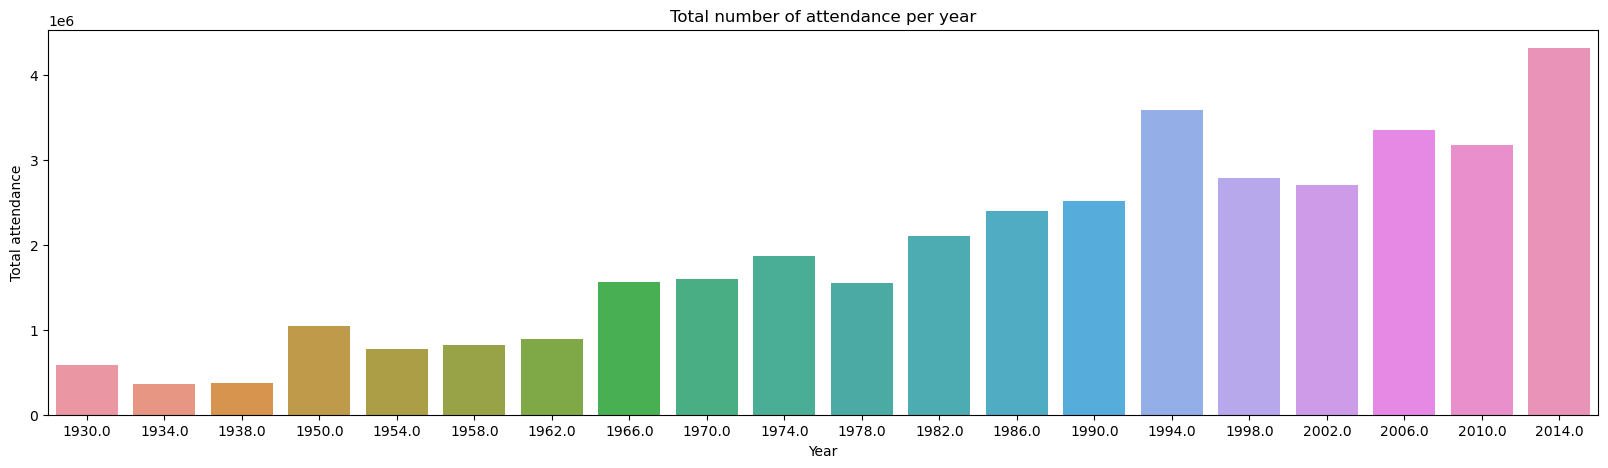

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x=grouped['Year'],y=grouped['Attendance'])
plt.xlabel('Year')
plt.ylabel('Total attendance')
plt.title('Total number of attendance per year')
plt.show()

In [40]:
grouped=matches[['City','MatchID']].groupby('City')['MatchID'].count().reset_index().sort_values('MatchID',ascending=False)

In [41]:
grouped

,City,MatchID
79,Mexico City,23
83,Montevideo,18
112,Rio De Janeiro,18
44,Guadalajara,17
55,Johannesburg,15
...,...,...
64,Lille,1
68,Lugano,1
1,Antibes,1
35,Eskilstuna,1


In [48]:
pip install geopandas matplotlib

     ---------------------------------------- 1.1/1.1 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [51]:
px.scatter_geo(grouped, 
               locations='City', 
               size='MatchID', 
               locationmode='country names', 
               color='City')